# Create figures using located tracks using one measurement

## Libraries

In [1]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams["font.size"] = 6

## Function

In [19]:
def velocity(data):
    res = np.sqrt(data)
    res = res.diff()/(1/40)
    res = res.mean()
    
    return res

## Analysis

### Velocity distributions along channel width

In [20]:
with open('../result/id553_on_off_1_track.txt', 'rb') as p:
    on_off_t = pickle.load(p)
    
with open('../result/id553_on_on_1_track.txt', 'rb') as p:
    on_on_t = pickle.load(p)

on_off_imsd = pd.read_csv('../result/id553_on_off_1_imsd.csv', index_col=0)
on_on_imsd = pd.read_csv('../result/id553_on_on_1_imsd.csv', index_col=0)

In [21]:
on_off_t = on_off_t.drop_duplicates(subset='particle')
on_on_t = on_on_t.drop_duplicates(subset='particle')

In [22]:
on_off_t

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
frame,,,,,,,,,,
0,23.744414,410.202055,36.795682,6.570641,0.030123,0.202508,254.093375,0.048274,0,1
0,26.434812,1454.999202,40.612281,6.729242,0.169417,0.228159,296.125201,0.035528,0,2
0,35.989188,257.238180,16.732551,6.822563,0.356631,0.149856,227.208837,0.062651,0,3
0,29.811337,289.580992,19.077593,6.360722,0.172913,0.167407,228.680784,0.061646,0,5
0,36.711044,513.357913,48.553290,6.115359,0.140578,0.305112,267.230481,0.043407,0,7
...,...,...,...,...,...,...,...,...,...,...
239,134.238504,30.829552,15.538708,4.999448,0.152536,0.182603,210.112226,0.078349,239,2875
239,435.692913,12.282053,18.774748,5.405762,0.111520,0.215948,221.661571,0.067629,239,2878
240,252.341709,21.788466,24.567731,6.264836,0.148483,0.224357,221.133154,0.068454,240,2883


In [23]:
on_on_t

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
frame,,,,,,,,,,
0,160.788250,2085.401226,40.933872,6.558730,0.123396,0.255225,278.650357,0.033088,0,0
0,184.761592,2268.061503,38.592890,6.503883,0.122681,0.215524,267.903654,0.035548,0,1
0,242.947709,245.982779,38.368859,6.352572,0.185715,0.253807,237.566353,0.044993,0,3
0,254.518940,556.988480,43.569782,6.874692,0.142066,0.215524,252.312758,0.039847,0,4
0,280.961084,307.586504,16.432251,6.824495,0.108505,0.161643,226.896008,0.049631,0,6
...,...,...,...,...,...,...,...,...,...,...
229,412.369798,20.177071,13.151827,4.721016,0.187771,0.183292,193.057331,0.071886,229,1064
232,332.216816,19.065457,20.356057,6.519986,0.082233,0.181321,203.168053,0.062787,232,1071
234,367.885880,24.176707,27.808082,5.800320,0.141367,0.214226,212.284382,0.056611,234,1076


In [24]:
on_off_v = velocity(on_off_imsd)

In [25]:
on_off_v.describe()

count    1128.000000
mean      672.289488
std        53.428077
min        -0.013288
25%       672.006168
50%       680.585573
75%       687.213220
max       717.444802
dtype: float64

In [26]:
on_off_t['Velocity'] = on_off_v.values
on_off_t['Hydrodynamic focusing'] = np.repeat('OFF', len(on_off_t))

In [27]:
on_off_t

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,Velocity,Hydrodynamic focusing
frame,,,,,,,,,,,,
0,23.744414,410.202055,36.795682,6.570641,0.030123,0.202508,254.093375,0.048274,0,1,65.153708,OFF
0,26.434812,1454.999202,40.612281,6.729242,0.169417,0.228159,296.125201,0.035528,0,2,307.589978,OFF
0,35.989188,257.238180,16.732551,6.822563,0.356631,0.149856,227.208837,0.062651,0,3,543.966934,OFF
0,29.811337,289.580992,19.077593,6.360722,0.172913,0.167407,228.680784,0.061646,0,5,542.071225,OFF
0,36.711044,513.357913,48.553290,6.115359,0.140578,0.305112,267.230481,0.043407,0,7,389.784389,OFF
...,...,...,...,...,...,...,...,...,...,...,...,...
239,134.238504,30.829552,15.538708,4.999448,0.152536,0.182603,210.112226,0.078349,239,2875,656.130538,OFF
239,435.692913,12.282053,18.774748,5.405762,0.111520,0.215948,221.661571,0.067629,239,2878,685.348104,OFF
240,252.341709,21.788466,24.567731,6.264836,0.148483,0.224357,221.133154,0.068454,240,2883,672.572999,OFF


In [28]:
on_on_v = velocity(on_on_imsd)

In [29]:
on_on_t['Velocity'] = on_on_v.values
on_on_t['Hydrodynamic focusing'] = np.repeat('ON', len(on_on_t))

In [30]:
on_on_t

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,Velocity,Hydrodynamic focusing
frame,,,,,,,,,,,,
0,160.788250,2085.401226,40.933872,6.558730,0.123396,0.255225,278.650357,0.033088,0,0,675.344544,ON
0,184.761592,2268.061503,38.592890,6.503883,0.122681,0.215524,267.903654,0.035548,0,1,682.644481,ON
0,242.947709,245.982779,38.368859,6.352572,0.185715,0.253807,237.566353,0.044993,0,3,692.064008,ON
0,254.518940,556.988480,43.569782,6.874692,0.142066,0.215524,252.312758,0.039847,0,4,691.902798,ON
0,280.961084,307.586504,16.432251,6.824495,0.108505,0.161643,226.896008,0.049631,0,6,669.678067,ON
...,...,...,...,...,...,...,...,...,...,...,...,...
229,412.369798,20.177071,13.151827,4.721016,0.187771,0.183292,193.057331,0.071886,229,1064,683.426633,ON
232,332.216816,19.065457,20.356057,6.519986,0.082233,0.181321,203.168053,0.062787,232,1071,688.108724,ON
234,367.885880,24.176707,27.808082,5.800320,0.141367,0.214226,212.284382,0.056611,234,1076,684.467792,ON


In [31]:
a_on_t = pd.concat([on_off_t, on_on_t])

In [32]:
a_on_t['y'] = a_on_t['y']/1.124

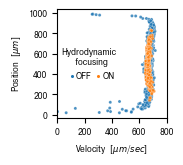

In [33]:
plt.figure(figsize=(1.41, 1.41))
sns.scatterplot(data=a_on_t, x='Velocity', y='y', hue='Hydrodynamic focusing', alpha=0.8, s=5)
plt.xlim(0, 800)
plt.xlabel(r'Velocity  [$\mu$$m$/$sec$]')
plt.ylabel(r'Position  [$\mu$$m$]')
plt.legend(title='Hydrodynamic\n     focusing', ncol=2, columnspacing=-0.2, markerscale=0.2, handletextpad=-0.5, loc='center left', borderaxespad=0.1, frameon=False)
plt.savefig('../result/velocity_distribution_along_width_9sec.pdf', bbox_inches='tight', pad_inches=0.05)

### Compare four conditions

In [34]:
off_off_imsd = pd.read_csv('../result/id553_off_off_1_imsd.csv', index_col=0)
off_on_imsd = pd.read_csv('../result/id553_off_on_1_imsd.csv', index_col=0)
on_off_imsd = pd.read_csv('../result/id553_on_off_1_imsd.csv', index_col=0)
on_on_imsd = pd.read_csv('../result/id553_on_on_1_imsd.csv', index_col=0)

In [35]:
res_off_off = velocity(off_off_imsd)
res_off_on = velocity(off_on_imsd)
res_on_off = velocity(on_off_imsd)
res_on_on = velocity(on_on_imsd)

In [36]:
res = pd.DataFrame({'Velocity': pd.concat([res_off_off, res_off_on, res_on_off, res_on_on])})
res['Focusing'] = np.concatenate([np.repeat('OFF & OFF', len(res_off_off)), np.repeat('OFF & ON', len(res_off_on)), 
                                 np.repeat('ON & OFF', len(res_on_off)), np.repeat('ON & ON', len(res_on_on))])

In [37]:
res

,Velocity,Focusing
0,0.136739,OFF & OFF
1,-0.065848,OFF & OFF
3,-0.021481,OFF & OFF
4,359.230910,OFF & OFF
5,354.829171,OFF & OFF
...,...,...
1064,683.426633,ON & ON
1071,688.108724,ON & ON
1076,684.467792,ON & ON
1088,678.590854,ON & ON


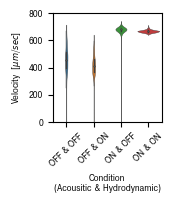

In [40]:
plt.figure(figsize=(1.41, 1.41))
sns.violinplot(data=res, y='Velocity', x='Focusing', linewidth=0.3)
plt.ylim(0, 800)
plt.xlabel('Condition\n(Acousitic & Hydrodynamic)')
plt.ylabel(r'Velocity  [$\mu$$m$/$sec$]')
plt.xticks(rotation=45)
plt.savefig('../result/velocity_distribution_four_conditions_9sec.pdf', bbox_inches='tight', pad_inches=0.05)

In [41]:
res_mean = res.groupby(['Focusing']).mean()
res_std = res.groupby(['Focusing']).std()

res_cv = res_std / res_mean

In [42]:
res_mean

,Velocity
Focusing,
OFF & OFF,455.972609
OFF & ON,416.788298
ON & OFF,672.289488
ON & ON,667.926807


In [43]:
res_std

,Velocity
Focusing,
OFF & OFF,88.662152
OFF & ON,71.851312
ON & OFF,53.428077
ON & ON,9.768166


In [44]:
res_cv

,Velocity
Focusing,
OFF & OFF,0.194446
OFF & ON,0.172393
ON & OFF,0.079472
ON & ON,0.014625
